# PHASE 3 PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

%matplotlib inline

### Data Cleaning

In [2]:
# Upload the data
data = pd.read_csv('data/data.csv')

In [3]:
# Dropping columns we are not going to use

df = data.drop(['phone number', 'total intl calls', 'total intl charge', 'total intl minutes'], axis=1)

In [4]:
# Making Yes and No into 0 and 1

df['international plan'] = df['international plan'].map(dict(yes=1, no=0))
df['voice mail plan'] = df['voice mail plan'].map(dict(yes=1, no=0))

In [5]:
# Making sure each columns is the data type it is supposed to be

df['area code'] = df['area code'].astype(object)

In [6]:
# Making 3 different data sets to isolate minutes called, number of calls, total charge

# df_minutes = df.drop(['total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls',
#                       'total night charge', 'total intl calls', 'total intl charge'], axis=1)
# df_calls = df.drop(['total day minutes', 'total day charge', 'total eve minutes', 'total eve charge',
#                    'total night minutes', 'total night charge','total intl minutes', 'total intl charge'], axis=1)
# df_charge = df.drop(['total day calls', 'total day minutes', 'total eve calls', 'total eve minutes',
#                     'total night calls', 'total night minutes', 'total intl calls', 'total intl minutes'], axis=1)

### Data Visualization

<AxesSubplot:>

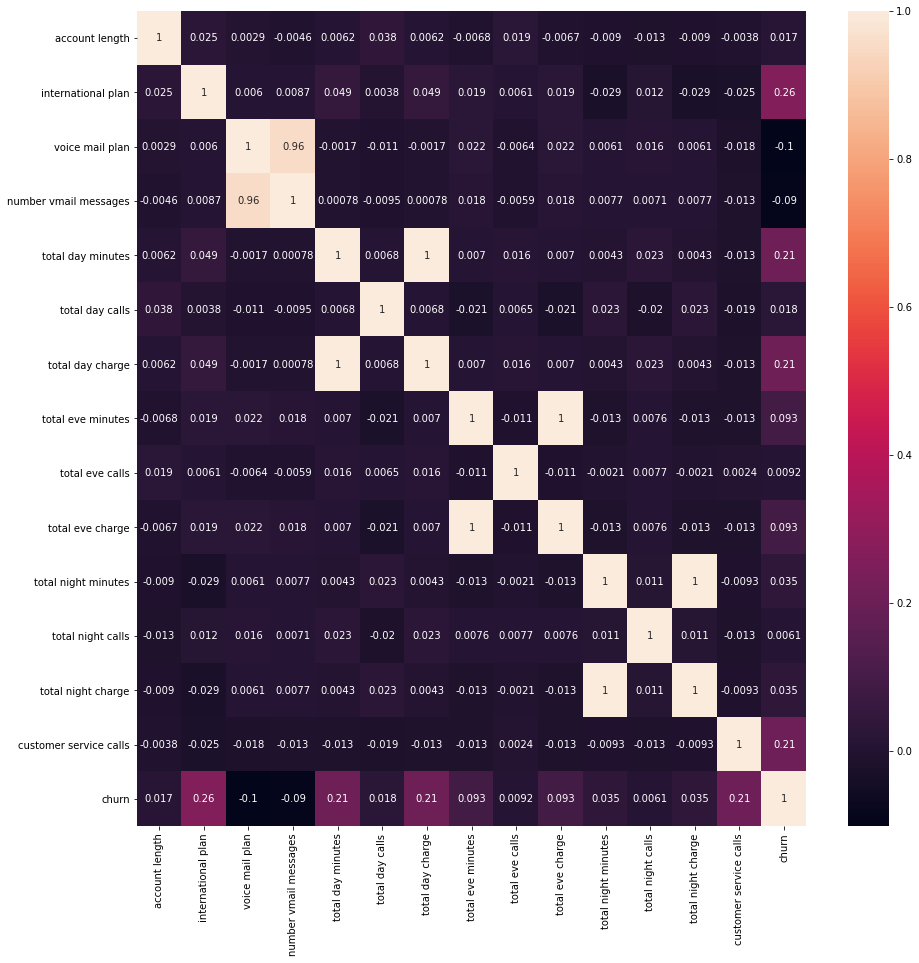

In [7]:
# Our target is churn rate, there is no strong correlation with any other variable, this is good news for any linear regression
# we plan on testing

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

### Dummy Model

In [8]:
# We see that we have a 85.5% success rate if we predict false all the time

df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

### Pipeline

In [9]:
# Get list of numerical and object columns

num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
# Create a ColumnTransformer to handle numerical and object columns separately

preprocessor = ColumnTransformer(
    transformers=[
        ('ss', StandardScaler(), num_cols),
        ('ohe', OneHotEncoder(), obj_cols)
    ]
)

### Train / Test data

In [11]:
# Split the data into features and labels

X = df.drop('churn', axis=1)
y = df['churn']

In [12]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Transform the train and test data

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### Create ML Models

In [14]:
# Initialize the models

log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [15]:
log_reg.fit(X_train_transformed, y_train)

LogisticRegression()

In [16]:
random_forest.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [17]:
decision_tree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [18]:
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [19]:
# Evaluate the models on the test data
print('Logistic Regression: ', log_reg.score(X_test_transformed, y_test))
print('Random Forest: ', random_forest.score(X_test_transformed, y_test))
print('Decision Tree: ', decision_tree.score(X_test_transformed, y_test))
print('K-Nearest Neighbors: ', knn.score(X_test_transformed, y_test))

Logistic Regression:  0.8545727136431784
Random Forest:  0.8800599700149925
Decision Tree:  0.8260869565217391
K-Nearest Neighbors:  0.8650674662668666


### Confusion Matrix

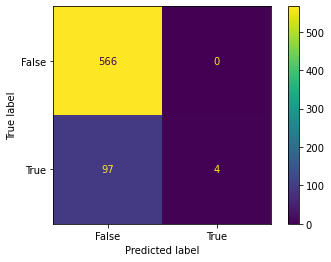

In [20]:
plot_confusion_matrix(log_reg, X_test_transformed, y_test)

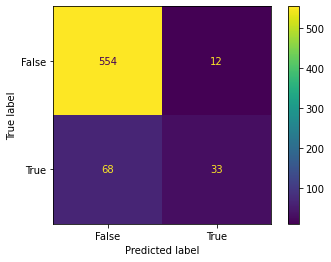

In [21]:
plot_confusion_matrix(random_forest, X_test_transformed, y_test)

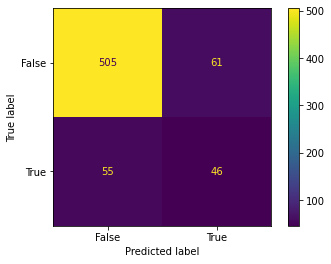

In [22]:
plot_confusion_matrix(decision_tree, X_test_transformed, y_test)

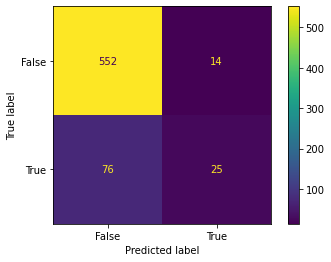

In [23]:
plot_confusion_matrix(knn, X_test_transformed, y_test)

### Random Forest Tuned
I am going to use "Random Forest" since it was the better performing model out of the 4.

In [24]:
# Specify the hyperparameters to tune

parameters = {'n_estimators': [10, 50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10], 
              'max_features': ['auto', 'sqrt']}

In [25]:
grid_search = GridSearchCV(random_forest, parameters, cv=5)
grid_search.fit(X=X_train_transformed, y=y_train)

KeyboardInterrupt: 

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
print("Best score for tuned hyperparameters: ", grid_search.best_score_)

In [ ]:
tuned_random_forest = RandomForestClassifier(criterion='entropy', max_features= 'auto', n_estimators=50)

In [ ]:
tuned_random_forest.fit(X_train_transformed, y_train)

In [ ]:
tuned_random_forest.score(X_test_transformed, y_test)

In [ ]:
prediction = tuned_random_forest.predict(X_test_transformed)

In [ ]:
plot_confusion_matrix(tuned_random_forest, X_test_transformed, y_test)

### Decission Tree Tuned

In [ ]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [ ]:
grid_search2 = GridSearchCV(decision_tree, dt_params, cv=5)
grid_search2.fit(X=X_train_transformed, y=y_train)

In [ ]:
print("Best hyperparameters:", grid_search2.best_params_)

In [ ]:
print("Best score for tuned hyperparameters: ", grid_search.best_score_)

In [ ]:
tuned_decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, min_samples_split=2)

In [ ]:
tuned_decision_tree.fit(X_train_transformed, y_train)

In [ ]:
tuned_decision_tree.score(X_test_transformed, y_test)

In [ ]:
plot_confusion_matrix(tuned_decision_tree, X_test_transformed, y_test)

### --- Difference between churn or no churn ---

In [ ]:
f_df = df[df['churn'] == False]

In [ ]:
t_df = df[df['churn'] == True]

Here is a list worth taking a look at since there is a noticeable between positive churn and negative churn 
- International Plan
- Voice Plan
- Customer Service Calls

In [ ]:
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']
df.groupby(['churn'])[columns_to_show].agg([np.mean, np.median, np.std, np.min, np.max])

In [ ]:
pd.crosstab(df['churn'], df['international plan'])

In [ ]:
pd.crosstab(df['churn'], df['voice mail plan'])

In [ ]:
pd.crosstab(df['churn'], df['customer service calls'])

# --- Visualization ---

In [ ]:
# Splitting the data for ease of use
f_df = df[df['churn'] == False]
t_df = df[df['churn'] == True]

In [ ]:
lul = f_df['international plan'].value_counts(normalize=True)

In [ ]:
lol = t_df['international plan'].value_counts(normalize=True)

In [ ]:
#sns.set(rc={"figure.dpi":100, 'savefig.dpi':200})
plt.style.use('ggplot')

In [ ]:
fig, ax = plt.subplots()

ax.bar(lol.index - 0.2, lol.values, width=0.4, color='lightcoral')

ax.bar(lol.index + 0.2, lul.values, width=0.4, color='lightskyblue')

ax.set_xticks(lol.index)
ax.set_xticklabels(['No International Plan', 'International Plan'])
ax.set_title('Customers')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.legend(['Churn', 'Stayed'])

plt.show()

### ---

In [ ]:
lal = f_df['voice mail plan'].value_counts(normalize=True)
lel = t_df['voice mail plan'].value_counts(normalize=True)

In [ ]:
fig, ax = plt.subplots()

ax.bar(lel.index - 0.2, lel.values, width=0.4, color='lightcoral')

ax.bar(lel.index + 0.2, lal.values, width=0.4, color='lightskyblue')

ax.set_xticks(lol.index)
ax.set_xticklabels(['No Voice Mail Plan', 'Voice Mail Plan'])
ax.set_title('Customers')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.legend(['Churn', 'Stayed'])

plt.show()

In [ ]:
WW = t_df['customer service calls'].mean()

In [ ]:
XX = f_df['customer service calls'].mean()

In [ ]:
fig, ax = plt.subplots()

ax.bar(['Churned', 'Stayed'], [WW, XX], color='lightcoral')


plt.show()